# Operacje morfologiczne

##### Przekształcenia morfologiczne cyfrowych obrazów, to takie przekształcenia, w wyniku których struktura lub forma obiektu na obrazie zostaje zmieniona. Dokonujemy ich na obrazie binarnym, czyli czarno-białym, a operacje morfologiczne polegają po prostu na zamianie wartości odpowiednich pikseli na przeciwne. Podstawowe przekształcenia to dylatacja, erozja i szkieletyzacja, które  można ze sobą łączyć, co daje podstawę do budowania skomplikowanych systemów analizy obrazu.

In [2]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Wczytanie obrazu

W celu wykonania operacji morfologicznych na obrazie, należy najpierw go wczytać i przekonwertować do postaci monochromatycznej (czyli do skali szarości). Oczywiście można tego dokonać na kilka sposobów, np. za pomocą komendy *Image.open()* z biblioteki <em>Pillow</em> oraz metody *convert* z&nbsp;parametrem&nbsp;'L'.  
Innym sposobem będzie ustawienie odpowiedniej metody w funkcji *imread()* z pakietu <em>OpenCV</em>: ``` cv2.imread(obraz, cv2.IMREAD_GRAYSCALE)```

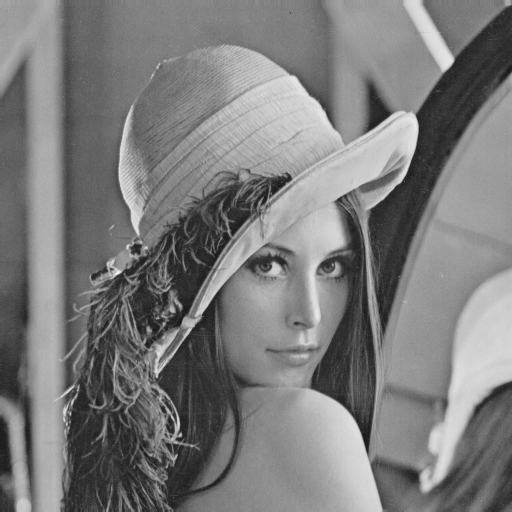

In [3]:
img = Image.open('../obrazy_testowe/lena_512x512.png').convert('L')
img

### Binaryzacja

Następnie obraz należy zamienić na postać macierzową, za pomocą metody *asarray()* z biblioteki *numpy*.
Na tak przetworzonym obrazie, można dokonać operacji binaryzacji, która polega na przeskalowania obrazu do dwóch wartości, w zależności od przyjętego progu. Najczęściej nowe wartości pikseli zapisuje się jako 0 i 1, ale możesz spotkać się też z innymi parami wartości, np: (0, 255), (-1, 1), (*True, False*).
Poniżej przedstawiono przykład binaryzacji dla trzech progów odcięcia – 25%, 50% i 75% maksymalnej wartości (u nas to 255).
Operacji binaryzacji dokonano za pomocą metody *threshold()* z biblioteki *OpenCV*. Do wyświetlenia obrazów użyto tym razem metody *imshow()* z pakietu *matplotlib.pyplot*, ponieważ zostały one wcześniej przekonwertowane na postać macierzową.  

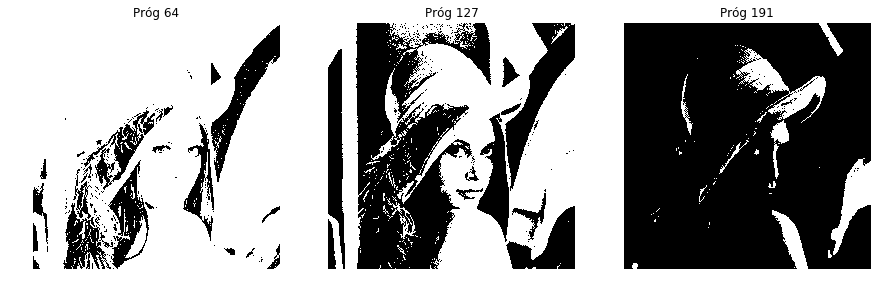

In [4]:
imgArray = np.asarray(img)
ret1, imgThresholded1 = cv2.threshold(imgArray, 64, 255, cv2.THRESH_BINARY)
ret2, imgThresholded2 = cv2.threshold(imgArray, 127, 255, cv2.THRESH_BINARY)
ret3, imgThresholded3 = cv2.threshold(imgArray, 191, 255, cv2.THRESH_BINARY)

plt.figure(1, figsize = (15, 10))

plt.subplot(131)
plt.title('Próg 64')
plt.axis('off')
plt.imshow(imgThresholded1, cmap = 'gray')

plt.subplot(132)
plt.title('Próg 127')
plt.axis('off')
plt.imshow(imgThresholded2, cmap = 'gray')

plt.subplot(133)
plt.title('Próg 191')
plt.axis('off')
plt.imshow(imgThresholded3, cmap = 'gray')

plt.show()

Jak widzisz, próg odcięcia diametralnie może zmienić obraz wynikowy, dlatego jego odpowiednie dobranie jest niezwykle ważne. Czasem robi się to ręcznie (najczęściej w oparciu o histogram obrazu), jednak istnieją także automatyczne metody i do dalszych operacji wykorzystano jedną z nich – metodę Otsu. Zauważ, że zmienia się teraz nieco sposób zapisu parametrów: próg odcięcia podajemy jako równy 0, a metodę Otsu wywołujemy poprzez dodanie *cv2.THRESH_OTSU*

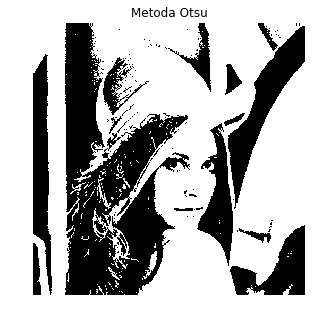

In [5]:
retOtsu, imgThresholdedOtsu = cv2.threshold(imgArray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(1, figsize = (5, 5))
plt.imshow(imgThresholdedOtsu, cmap = 'gray')
plt.title('Metoda Otsu')
plt.axis('off')
plt.show()

### Operacje morfologiczne

Na tak przetworzonym obrazie, można już wykonywać operacje morfologiczne. Konieczny jest wybór elementu strukturalnego (kernel, maska) oraz jego wielkości. W poniższym przykładzie wykorzystano kwadrat o wielkości 5 pikseli, ale może to być w zasadzie element o dowolnym kształcie (oczywiście o ile jest mniejszy od obrazu ;) ). Poprzez nakładanie takiej maski, można wykonać szereg operacji, jak na przykład erozję i dylatację czy otwarcie i zamknięcie (które są odpowiednią kobinacją erozji oraz dylatacji). W każdym przypadku element strukturalny przesuwa się wzdłuż obrazu, a następnie dla każdego piksela sprawdza jego sądziedztwo. W zależności od wyboru algorytmu, można zaobserwować następujące różnice na obrazach wynikowych.

In [6]:
kernel = np.ones((5,5), np.uint8)
imgErosion = cv2.erode(imgThresholdedOtsu, kernel, iterations = 1)
imgDilation = cv2.dilate(imgThresholdedOtsu, kernel, iterations = 1)

Jak widzisz podstawowe operacje morfologiczne doczekały się nawet własnych funkcji. Niżej użyliśmy jeszcze funkcji *morphologyEx()*, która posiada wiele innych metod, będących rozwinięciem tych przekształceń.

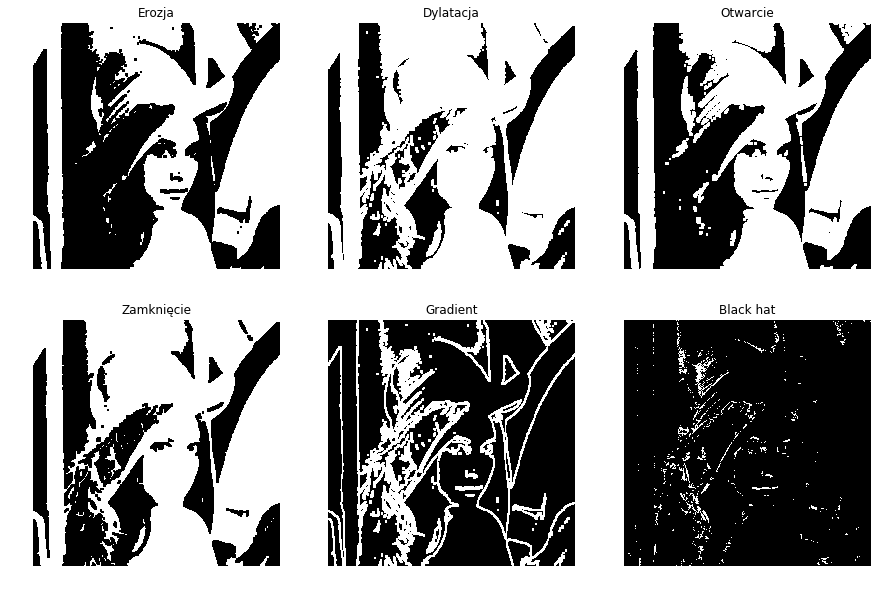

In [7]:
imgOpening = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_OPEN, kernel)
imgClosing = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_CLOSE, kernel)
imgGradient = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_GRADIENT, kernel)
imgBlackhat = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_BLACKHAT, kernel)

plt.figure(1, figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgErosion, cmap = 'gray')
plt.title('Erozja')
plt.axis('off')

plt.subplot(232)
plt.imshow(imgDilation, cmap = 'gray')
plt.title('Dylatacja')
plt.axis('off')

plt.subplot(233)
plt.imshow(imgOpening, cmap = 'gray')
plt.title('Otwarcie')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgClosing, cmap = 'gray')
plt.title('Zamknięcie')
plt.axis('off')

plt.subplot(235)
plt.imshow(imgGradient, cmap = 'gray')
plt.title('Gradient')
plt.axis('off')

plt.subplot(236)
plt.imshow(imgBlackhat, cmap = 'gray')
plt.title('Black hat')
plt.axis('off')

plt.show()